#CREDIT CARD FRAUD DETECTION

**Overview**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
df.isnull().values.any()

False

In [ ]:
#Data Class Balance Check
print('Fraud Percentage: {}'.format(round((df['Class'].value_counts()[1]/len(df))*100,2)))
print('Non Fraud Percentage: {}'.format(round((df['Class'].value_counts()[0]/len(df))*100,2)))

Fraud Percentage: 0.17
Non Fraud Percentage: 99.83


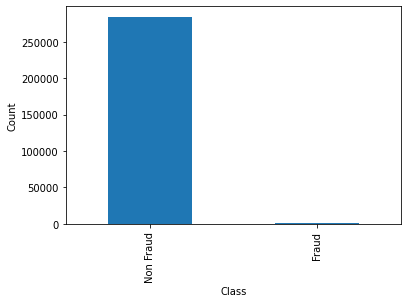

In [ ]:
count= df['Class'].value_counts()
count.plot(kind='bar')
plt.xticks(range(2),['Non Fraud','Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Distributions**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


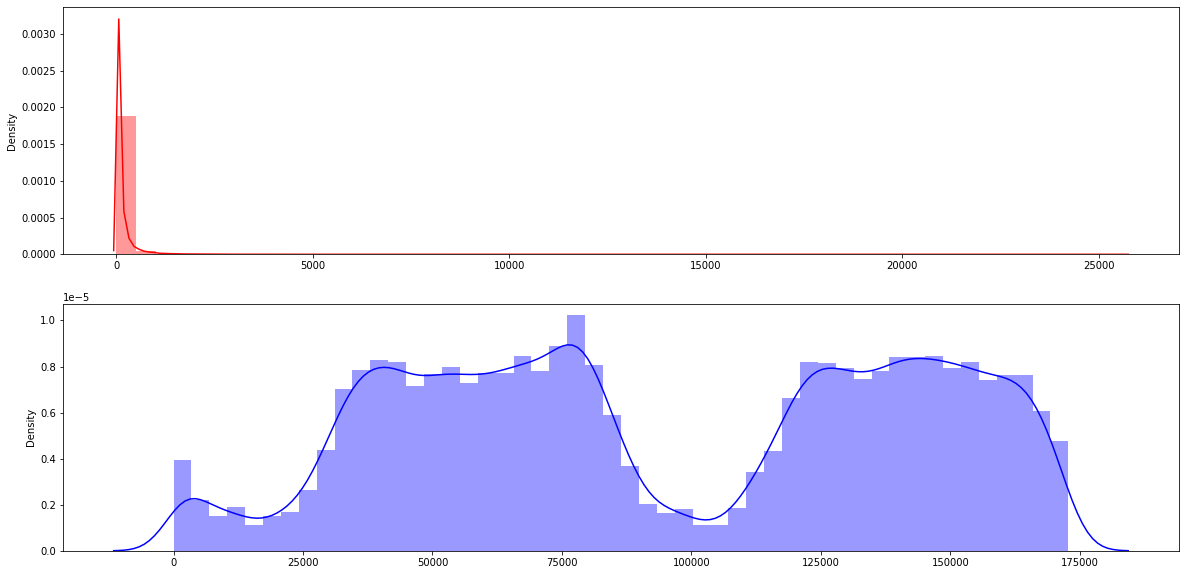

In [ ]:
fig, ax= plt.subplots(2,1, figsize=(20,10))

amount= df['Amount'].values
time= df['Time'].values

sns.distplot(amount,ax=ax[0], color='r')
sns.distplot(time,ax=ax[1],color='b')


**Scaling**

As data is given after PCA to hide original data so scalling was done on the variables except time and amount which we will scale

In [ ]:
from sklearn.preprocessing import RobustScaler # it is prone to outliers
ss1= RobustScaler()
df['Amount']= ss1.fit_transform(df['Amount'].values.reshape(-1, 1))

In [ ]:
ss2= RobustScaler()
df['Time']= ss2.fit_transform(df['Time'].values.reshape(-1, 1))

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


**Splitting the Data (Original DataFrame)**

Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [ ]:
xorg=df.drop('Class',axis=1)
yorg= df.loc[:,'Class']

In [ ]:
from sklearn.model_selection import train_test_split
xorgtrain,xorgtest,yorgtrain,yorgtest= train_test_split(xorg,yorg,test_size=0.2,random_state=9)


In [ ]:
print(xorgtrain.shape,xorgtest.shape,yorgtrain.shape,yorgtest.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


**Random Sampling**

we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

**Using imblearn library**

In [ ]:
 from imblearn.under_sampling import NearMiss

 nm=NearMiss(random_state=9)
 xr,yr= nm.fit_sample(xorg,yorg)

 from collections import Counter
 print('Original Count: {}'.format(Counter(yorg)))
 print('Sampled Count: {}'.format(Counter(yr)))

 # Now we have equal fraud and non fraud data.

 new_df= pd.concat([pd.DataFrame(xr,columns=xorg.columns),pd.DataFrame(yr)],axis=1)

 new_df= new_df.rename({0:'Class'},axis=1)

 new_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Original Count: Counter({0: 284315, 1: 492})
Sampled Count: Counter({0: 492, 1: 492})


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.455586,1.927638,1.320291,-2.600122,3.933076,1.953219,0.034466,0.680236,-0.061683,-1.618814,0.328515,1.079724,0.099510,0.370998,-2.723163,-1.712435,1.581280,1.491177,1.072475,-1.347176,-0.134579,-0.163703,-0.371098,0.013208,-0.049736,0.283204,-0.000671,-0.025361,0.001661,-0.254594,0
1,0.957988,1.871702,1.106509,-1.876864,4.064366,1.334907,0.118505,0.288013,0.079950,-1.215343,0.372612,1.200107,0.132575,-0.124198,-2.631536,-1.831271,1.514802,1.480784,0.960339,-1.458427,-0.189996,-0.170152,-0.366767,0.143651,0.385827,0.046612,-0.087760,-0.004351,0.007755,-0.307413,0
2,-0.160587,-0.465511,1.293542,0.909931,0.805013,0.329358,-1.316649,0.877948,-0.202594,-0.542755,-0.870288,0.140193,-0.398560,-0.429253,-1.128894,0.866684,0.322402,0.813021,0.553143,-0.553549,-0.103891,0.051572,0.129026,-0.145944,0.586362,0.206361,-0.396964,-0.070669,0.051545,-0.293440,0
3,-0.063253,-0.272513,1.275378,0.814107,0.731147,0.461421,-1.122808,0.866315,-0.134538,-0.566607,-0.976048,-0.188011,-0.591805,-0.543467,-1.076650,0.896879,0.433677,0.713710,0.684959,-0.439844,-0.071516,0.018121,0.047025,-0.264227,0.258076,0.237335,-0.366500,0.053858,0.056949,-0.293440,0
4,-0.648563,-0.425745,1.379091,0.645260,0.697394,0.702898,-0.681755,0.816204,-0.048358,-0.545737,-1.032278,0.162020,-0.450483,-0.367552,-1.412712,1.162116,0.211022,1.193565,0.326114,-0.838691,-0.106515,0.047356,0.135716,-0.248643,-0.071925,0.156898,-0.350277,-0.057853,0.057242,-0.293440,0


**Using shuffling and selecting first 492 non fraud**

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492] #Taking top 492 row for 0

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258500,0.869254,2.090978,-0.115276,-1.467317,0.059333,0.427308,-0.301085,0.072752,-0.133147,0.323707,0.238135,0.077173,0.889126,0.342853,0.374096,-0.606154,0.379916,-0.920026,-0.064263,0.818612,-0.168068,-0.302364,-0.759341,0.199356,-1.031964,-0.186239,0.241060,-0.074714,-0.080025,-0.279746,0
192382,0.528390,0.753356,2.284988,-5.164492,3.831112,-0.073622,-1.316596,-1.855495,0.831079,-1.567514,-3.224559,3.369558,-3.468545,-1.383571,-6.020579,0.309602,-2.617767,-1.310752,0.409660,2.362291,0.285792,0.382007,0.033958,0.187697,0.358433,-0.488934,-0.258802,0.296145,-0.047174,-0.279466,1
109294,-0.157156,1.221014,0.230545,0.237087,0.494914,-0.109718,-0.588650,0.159470,-0.188082,-0.154067,-0.121275,0.106765,0.885196,1.223432,0.120155,1.067793,-0.209198,-0.130845,-0.948387,-0.535459,-0.042740,0.040260,0.227962,-0.050060,0.164573,0.470286,0.527686,-0.026789,0.008251,-0.148397,0
119781,-0.107038,-2.866364,2.346949,-4.053307,3.983359,-3.463186,-1.280953,-4.474764,1.216655,-2.309829,-5.515507,3.048392,-7.128251,0.005956,-7.495187,-0.251088,-7.568015,-12.223633,-4.895175,2.524967,0.270013,1.049732,0.475840,0.404480,0.282030,-0.506901,-0.371741,0.615257,0.803163,1.432684,1
6329,-0.906648,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.293440,1


In [ ]:
new_df.shape

(984, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Correlation Matrices**

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

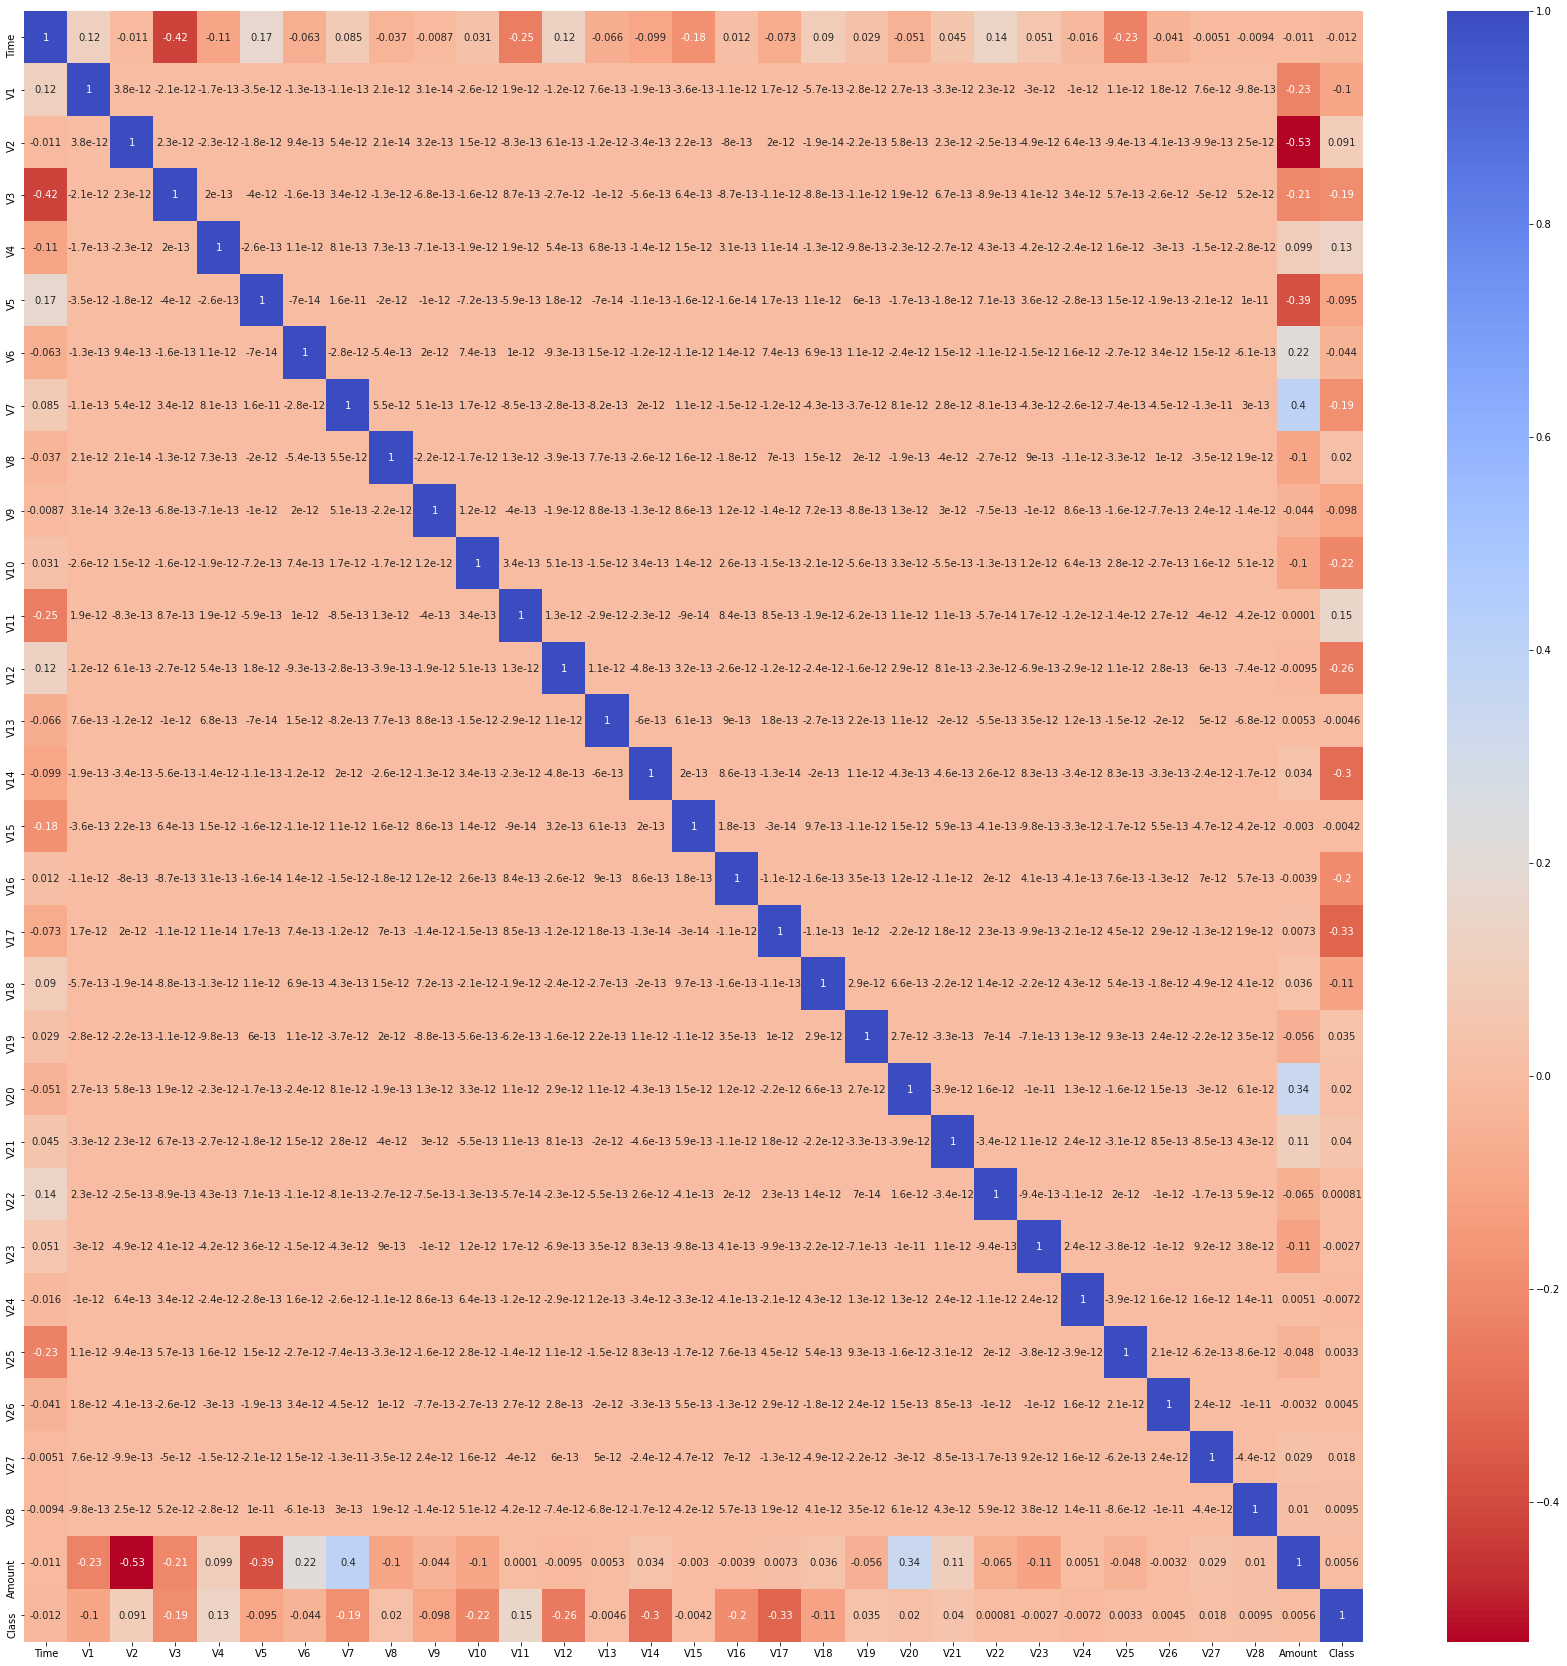

In [ ]:
#for Original Data frame
plt.figure(figsize=(30,30))

sns.heatmap(df.corr(),annot=True,cmap='coolwarm_r')

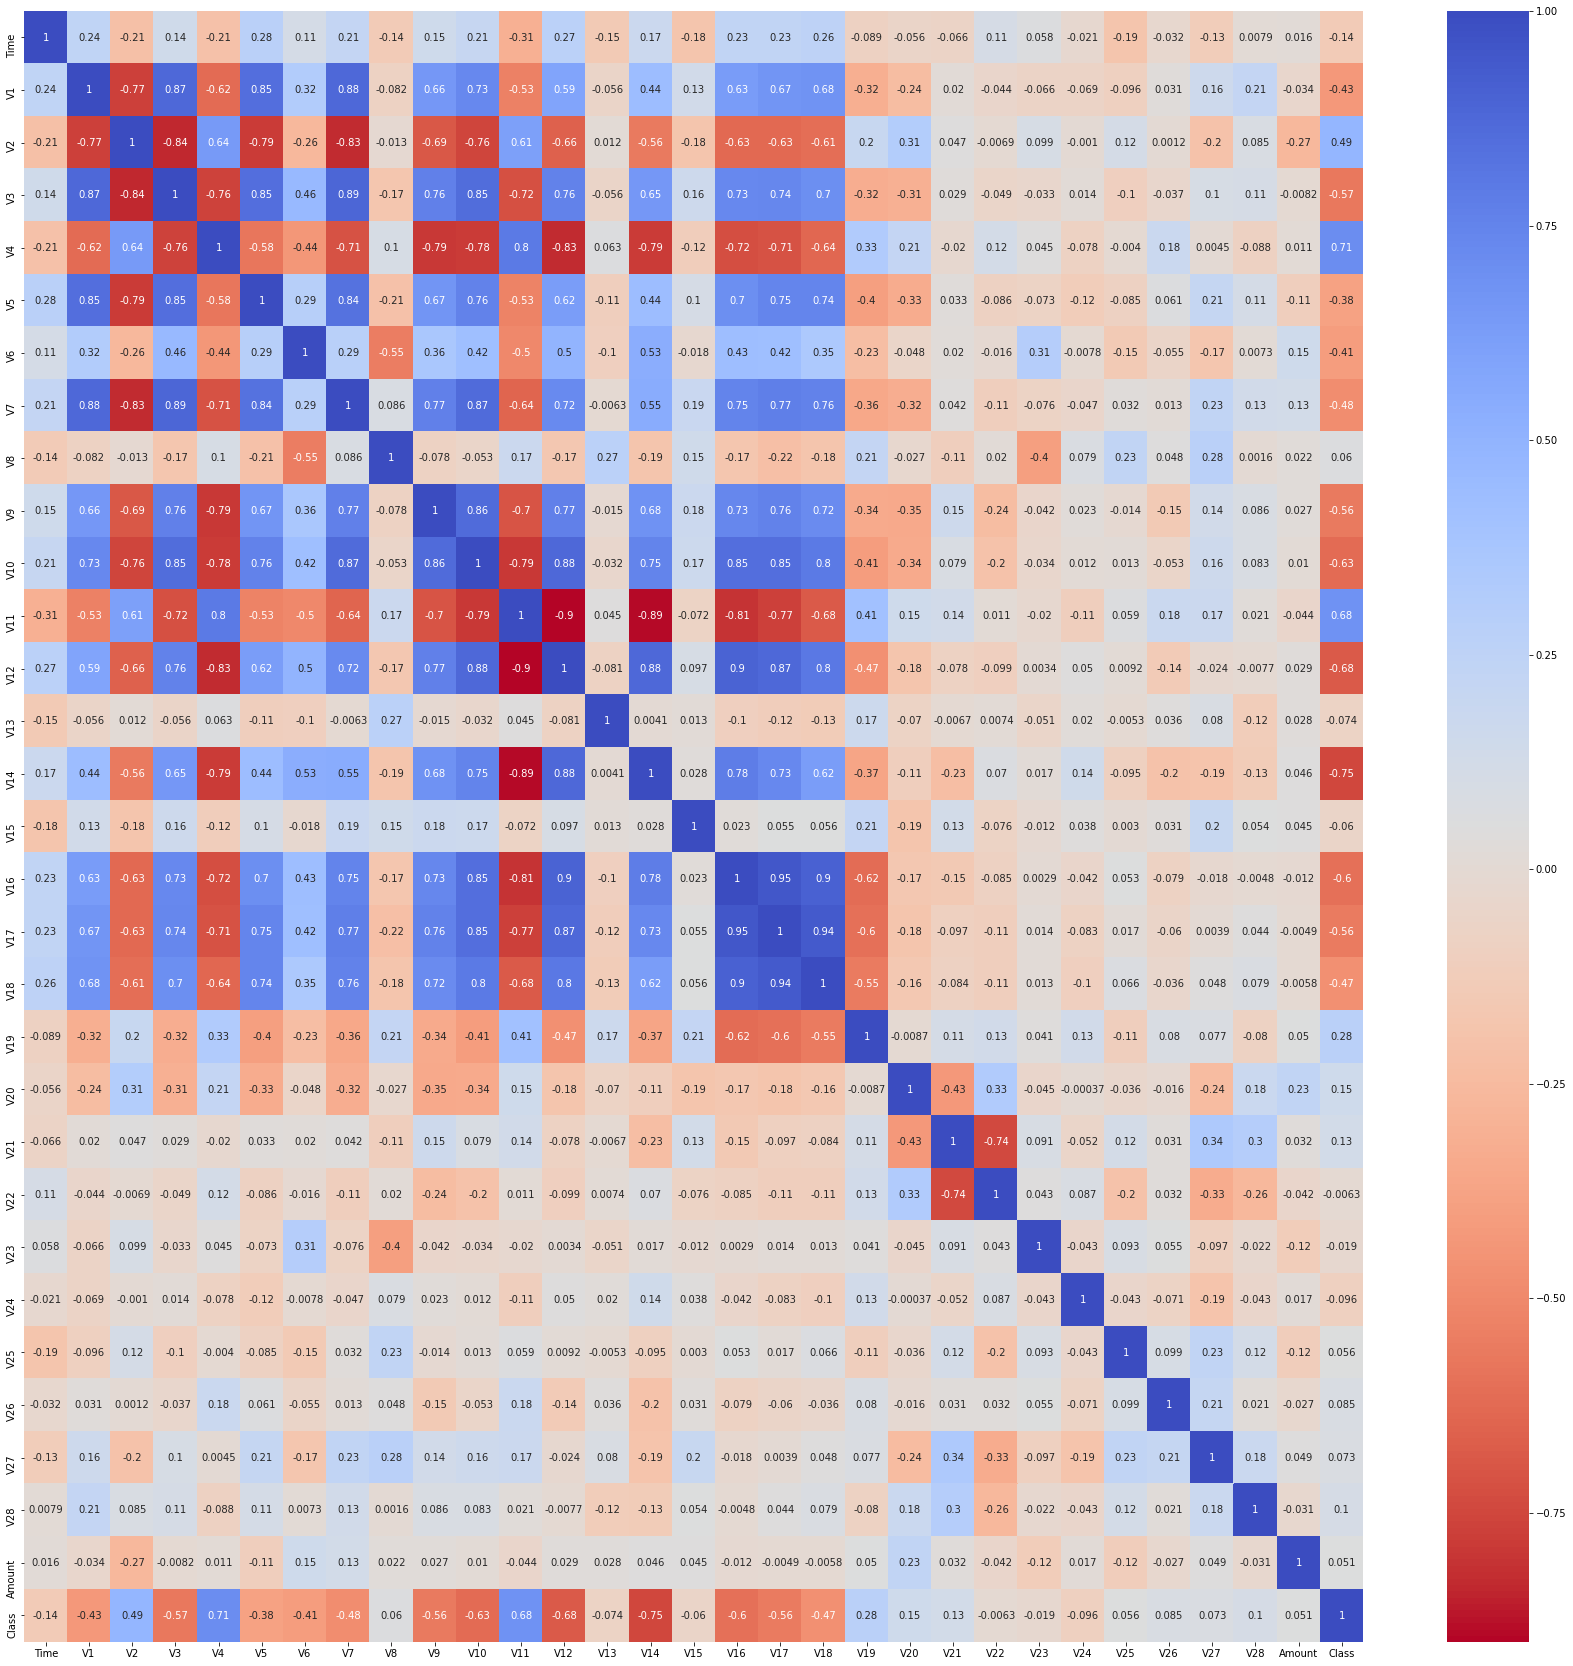

In [ ]:
#For new sampled df
#for Original Data frame
plt.figure(figsize=(30,30))

sns.heatmap(new_df.corr(),annot=True,cmap='coolwarm_r')

1.Negative Correlations: V17,V16, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

2.Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

3.BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

**Negative Correlation**

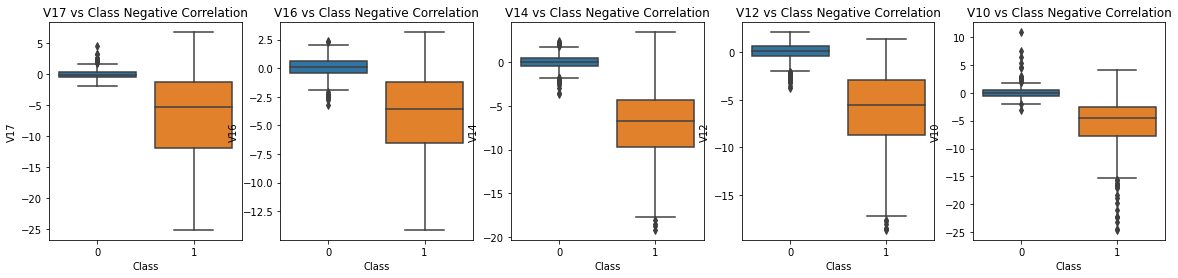

In [ ]:
neg= ['V17','V16','V14','V12','V10']

f, axes = plt.subplots(ncols=len(neg), figsize=(20,4))
for i,j in enumerate(neg):
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
    sns.boxplot(x="Class", y=j, data=new_df, ax=axes[i])
    axes[i].set_title(j + ' vs Class Negative Correlation')

**Postive Correlation**


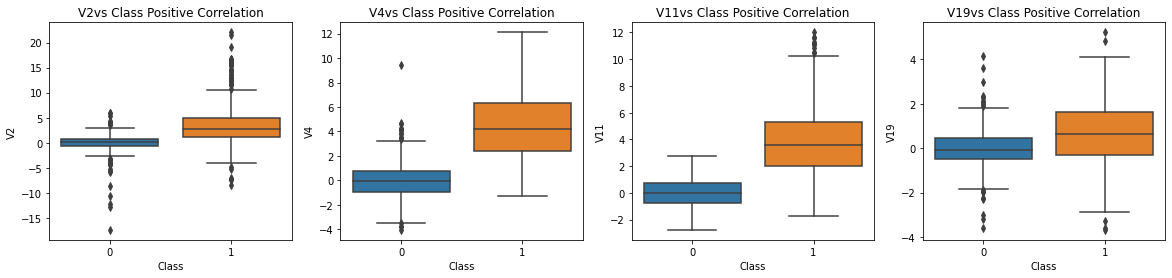

In [ ]:
pos= ['V2','V4','V11','V19']

f, axes = plt.subplots(ncols=len(pos), figsize=(20,4))
for i,j in enumerate(pos):
# Postive Correlations with our Class (The higher our feature value the more likely it will be a fraud transaction)
    sns.boxplot(x="Class", y=j, data=new_df, ax=axes[i])
    axes[i].set_title(j+'vs Class Positive Correlation')

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).



**Anomly Detection**

1.visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

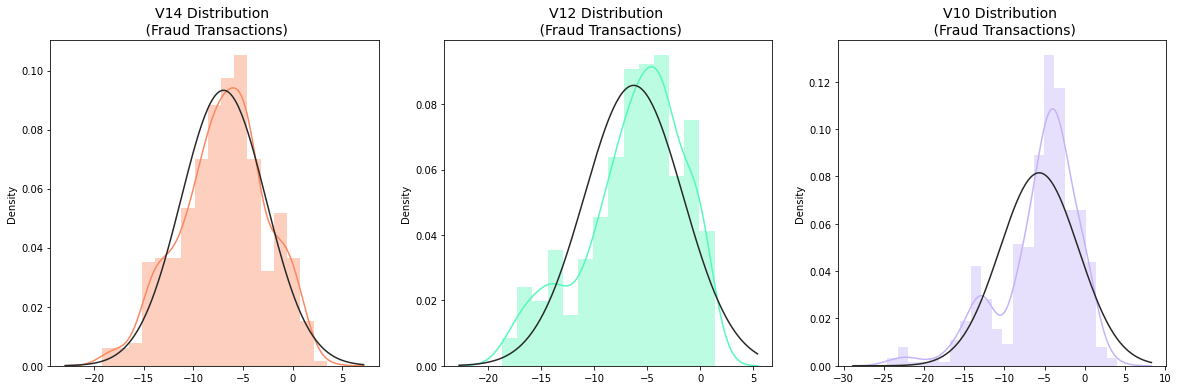

In [ ]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()


**Outlier Treatment**

In [ ]:
df2= new_df # Creating the copy of new_df to preserve the original data
treat= ['V14','V12','V10']
for j in treat:
    q25,q75= new_df[j].quantile(q=0.25),new_df[j].quantile(q=0.75)
    iqr= q75-q25
    cut_off= iqr*1.5
    lb,ub= q25-cut_off,q75+cut_off
    outliers= [x for x in new_df[j] if x<=lb or x>=ub]
    print(j,'Q25: {} , Q75: {}, IQR: {}, Cutoff: {}, LB: {}, UB: {},'.format(q25,q75,iqr,cut_off,lb,ub))
    print(len(outliers), outliers)
    df2= df2.drop(df2[(df2['V14'] > ub) | (df2['V14']< lb)].index, axis=0)
    print(df2.shape)
    print('----' * 44)
    

V14 Q25: -6.7217989752500005 , Q75: 0.13255780175, IQR: 6.8543567770000005, Cutoff: 10.281535165500001, LB: -17.003334140750002, UB: 10.414092967250001,
8 [-18.04999769, -17.72163835, -17.23020216, -19.21432549, -17.62063435, -18.82208674, -17.47592128, -18.49377336]
(976, 31)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Q25: -5.49522052125 , Q75: 0.20840848325000003, IQR: 5.703629004500001, Cutoff: 8.55544350675, LB: -14.050664028, UB: 8.763851990000001,
44 [-15.53161118, -14.56397976, -15.564837599999999, -14.468655100000001, -14.05606118, -14.15416536, -18.43113103, -16.06030576, -14.17503016, -14.97975476, -17.00328945, -17.13130095, -15.59232322, -16.72833933, -14.394766800000001, -15.09416315, -16.38805417, -17.00328945, -17.76914346, -17.18291843, -17.18291843, -15.71760665, -14.16812088, -14.29609143, -16.46550394, -14.98543373, -18.55369701, -

In [ ]:
df2.shape

(904, 31)

In [ ]:
from collections import Counter
Counter(df2['Class'])

Counter({0: 492, 1: 412})

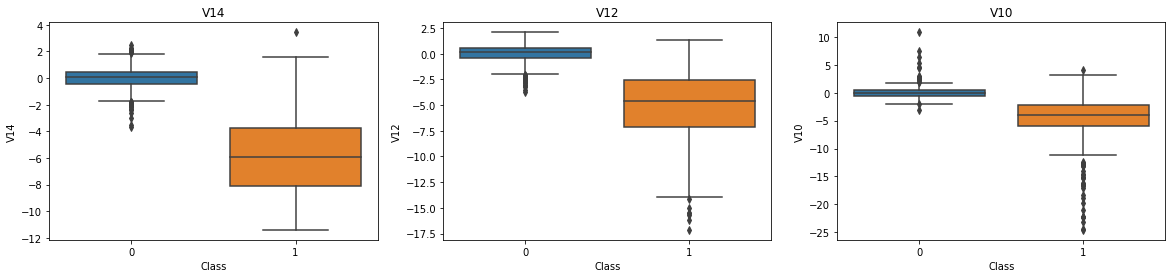

In [ ]:
f, axes = plt.subplots(ncols=len(treat), figsize=(20,4))
for i,j in enumerate(treat):
# Postive Correlations with our Class (The higher our feature value the more likely it will be a fraud transaction)
    sns.boxplot(x="Class", y=j, data=df2, ax=axes[i])
    axes[i].set_title(j)

In [ ]:

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression

x=df2.drop('Class',axis=1).values
y= df2.loc[:,'Class'].values

# Splitting the test and train after removing outliers

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [ ]:
# Training the algorithm
lr_model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predictions on training and testing data
lr_pred_train = lr_model.predict(xtrain)
lr_pred_test = lr_model.predict(xtest)

Before going further into metrics, let's first decide either Type-I or Type-II error is more important to consider.

Type-I Error or False Positives: False Positives are the ones which are actually not fraud but the prediction said that they are fraud. Type-II Error or False Negatives: False Negatives are the ones which are actually fraud but the system said that they aren't.

Well, we can say that Type-II Error is more significant because we don't want system to have a fraudulent credit card because that can be more dangerous.

So, for Type-II Error, We can say that recall is the important metric.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(ytest, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,86,6
Not Fraud,6,83


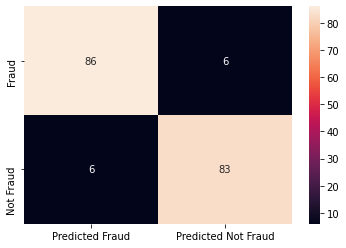

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(ytest, lr_pred_test))


Accuracy:  0.9337016574585635
